In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Path to the dataset
healthy_dir = '../PlantVillage/Tomato_healthy'
mold_dir = '../PlantVillage/Tomato_Leaf_Mold'


img_size = (128, 128)


def load_and_preprocess(folder_path, label):
    images = []
    labels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0 
        images.append(img_array)
        labels.append(label)
    return images, labels

healthy_images, healthy_labels = load_and_preprocess(healthy_dir, 0) 
mold_images, mold_labels = load_and_preprocess(mold_dir, 1) 

X = np.concatenate([healthy_images, mold_images], axis=0)
y = np.concatenate([healthy_labels, mold_labels], axis=0)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

model.save('../Model/tomato_disease_detection_model.h5')


Epoch 1/10
51/51 [==============================] - 12s 224ms/step - loss: 0.5101 - accuracy: 0.7296 - val_loss: 0.7888 - val_accuracy: 0.7273
Epoch 2/10
51/51 [==============================] - 11s 223ms/step - loss: 0.2222 - accuracy: 0.9060 - val_loss: 0.0545 - val_accuracy: 0.9877
Epoch 3/10
51/51 [==============================] - 11s 223ms/step - loss: 0.0494 - accuracy: 0.9859 - val_loss: 0.0512 - val_accuracy: 0.9828
Epoch 4/10
51/51 [==============================] - 12s 228ms/step - loss: 0.0335 - accuracy: 0.9883 - val_loss: 0.0312 - val_accuracy: 0.9926
Epoch 5/10
51/51 [==============================] - 12s 229ms/step - loss: 0.0350 - accuracy: 0.9883 - val_loss: 0.0238 - val_accuracy: 0.9926
Epoch 6/10
51/51 [==============================] - 12s 232ms/step - loss: 0.1050 - accuracy: 0.9576 - val_loss: 0.0711 - val_accuracy: 0.9730
Epoch 7/10
51/51 [==============================] - 12s 232ms/step - loss: 0.0613 - accuracy: 0.9803 - val_loss: 0.0769 - val_accuracy: 0.9705

c:\Users\Tarun Samala\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


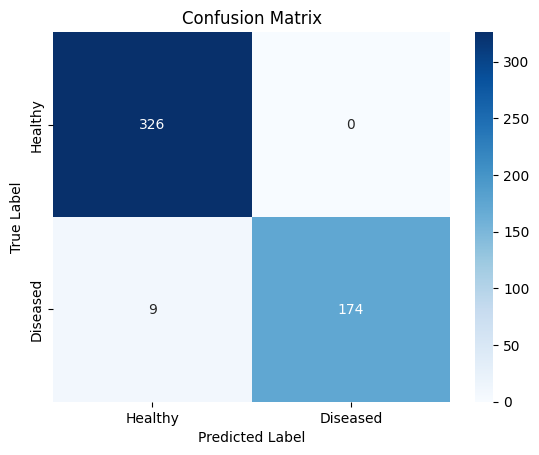

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Healthy', 'Diseased']

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

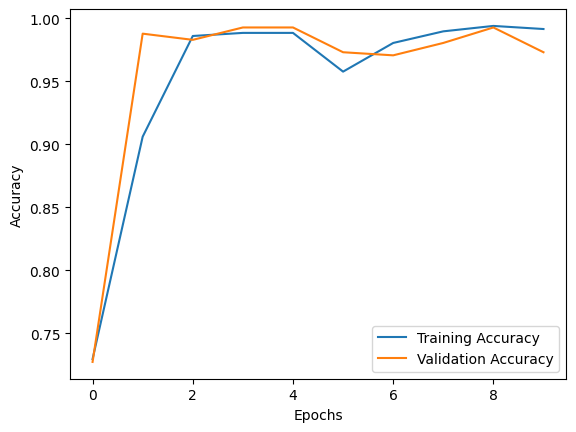

In [4]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

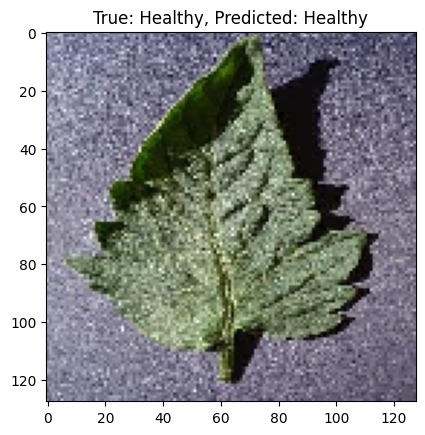

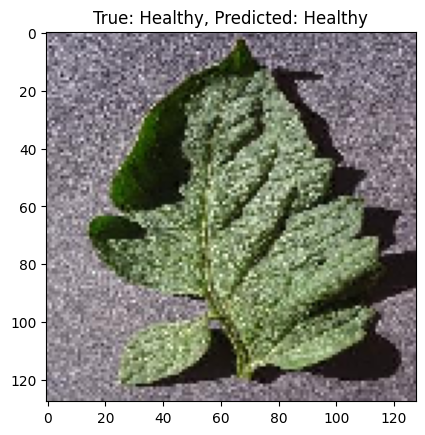

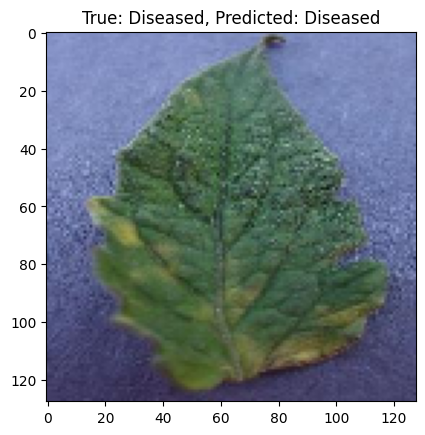

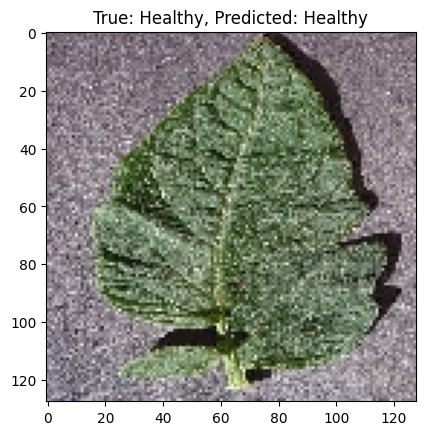

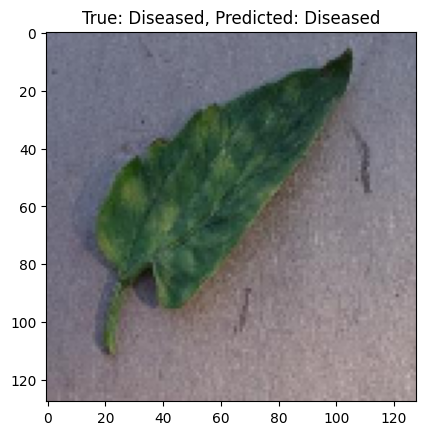

In [5]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 5

sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

for index in sample_indices:
    plt.imshow(X_test[index])
    
    true_label = "Diseased" if y_test[index] == 1 else "Healthy"
    pred_label = "Diseased" if y_pred_classes[index] == 1 else "Healthy"
    
    plt.title(f'True: {true_label}, Predicted: {pred_label}')
    
    plt.show()
